In [160]:
from google.colab import files
import io

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [162]:
uploaded = files.upload()

Saving 6_titanic.csv to 6_titanic (2).csv


In [180]:
titanic_data = pd.read_csv("6_titanic.csv")

###Data Exploration###

Esloriamo i dati per trovare correlazioni o caratteristiche "a occhio".


In [181]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    fig=sns.barplot(ms.index, ms["Percent"],color="green",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percent of missing values', fontsize=15)
    plt.title('Percent missing data by feature', fontsize=15)
    return ms

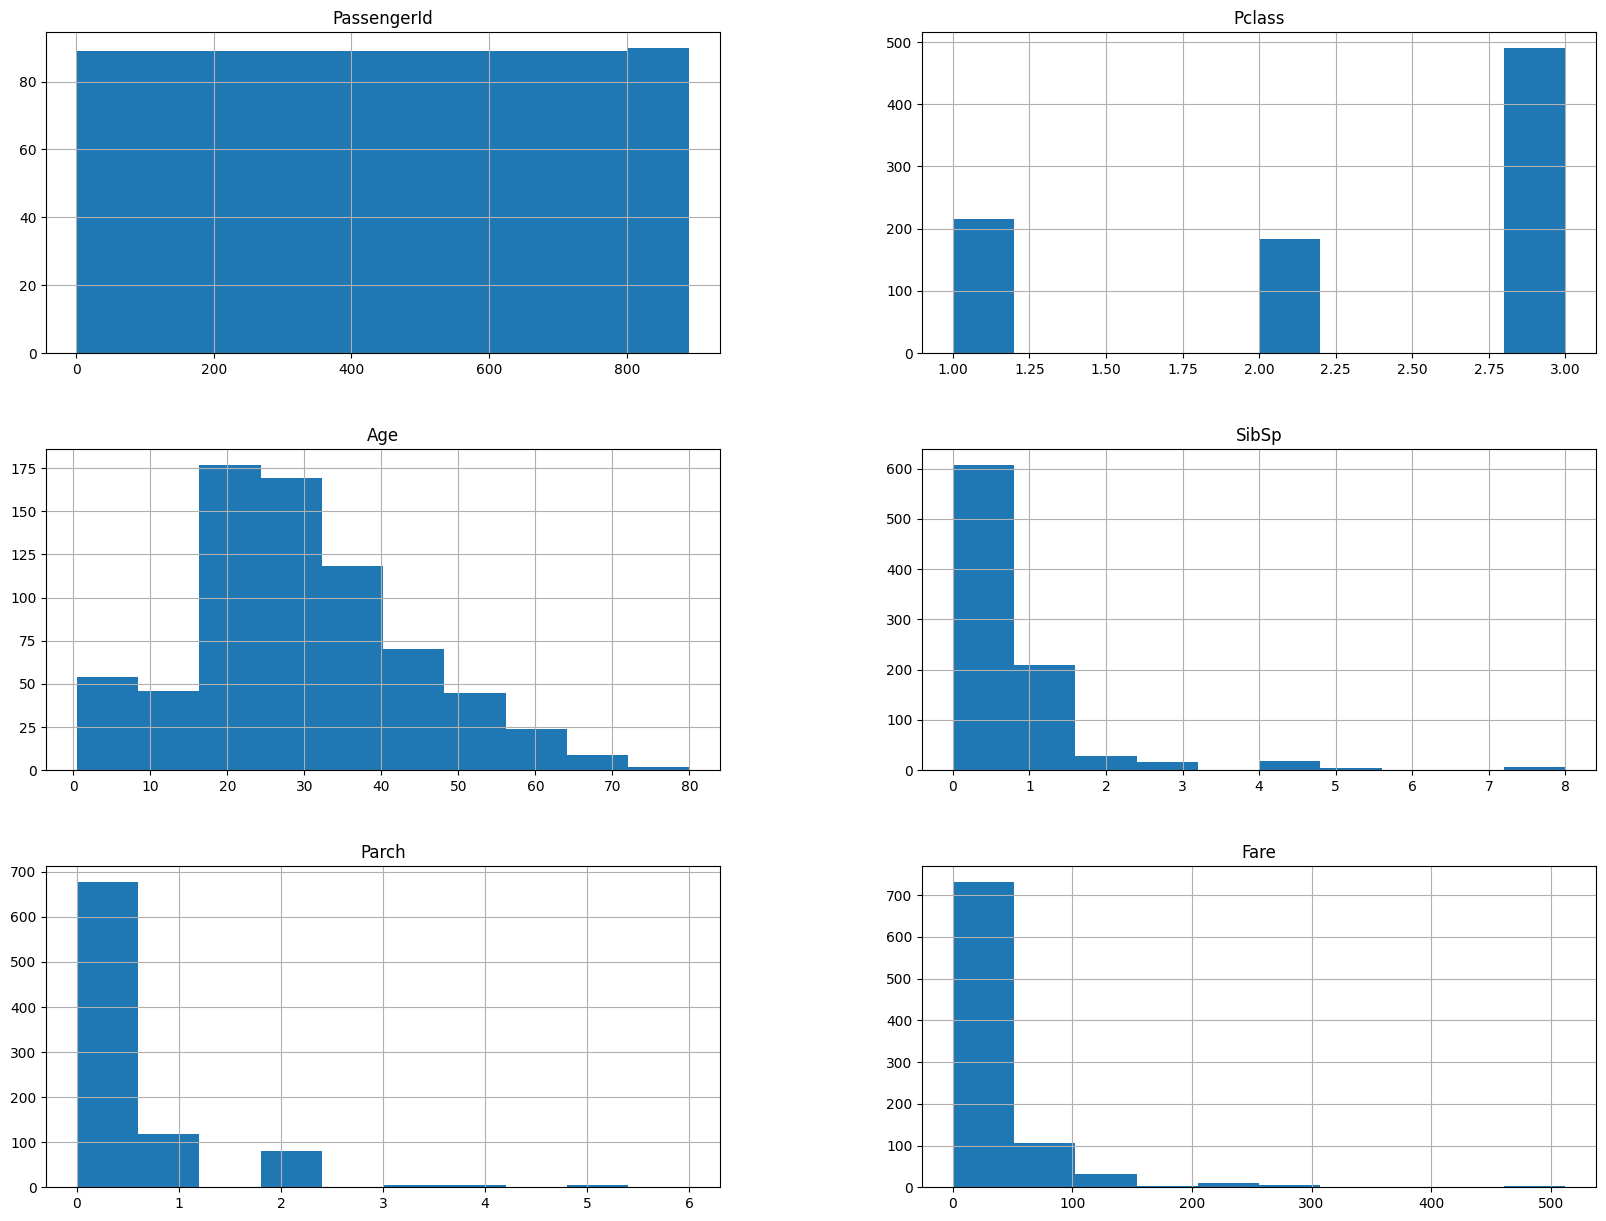

In [188]:
# Distribuzione delle singole features
titanic_data.hist(figsize=(20, 15))

plt.savefig('feature_dostribution.pdf')

In [172]:
# Per le variabili ategoriche possiamo guardare alla distribuzione dei valori
titanic_data["Age"].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
28.00    25
         ..
36.50     1
55.50     1
0.92      1
23.50     1
74.00     1
Name: Age, Length: 88, dtype: int64

In [ ]:
# Studiamo anche la correlazione fra le varie variabili
pd.crosstab(index=titanic_data["Ticket"], columns=titanic_data["Fare"])

<ipython-input-179-19d5bc0d8515>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correl = sns.heatmap(titanic_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)


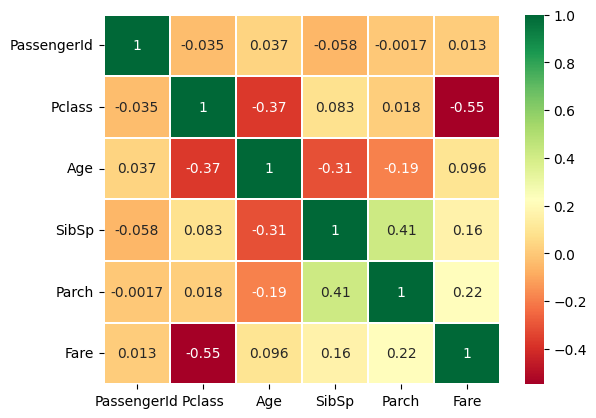

In [179]:
correl = sns.heatmap(titanic_data.corr(),annot=True,cmap='RdYlGn',linewidths=0.2)

figure = correl.get_figure()
figure.savefig('correlation_features.png', dpi=600)

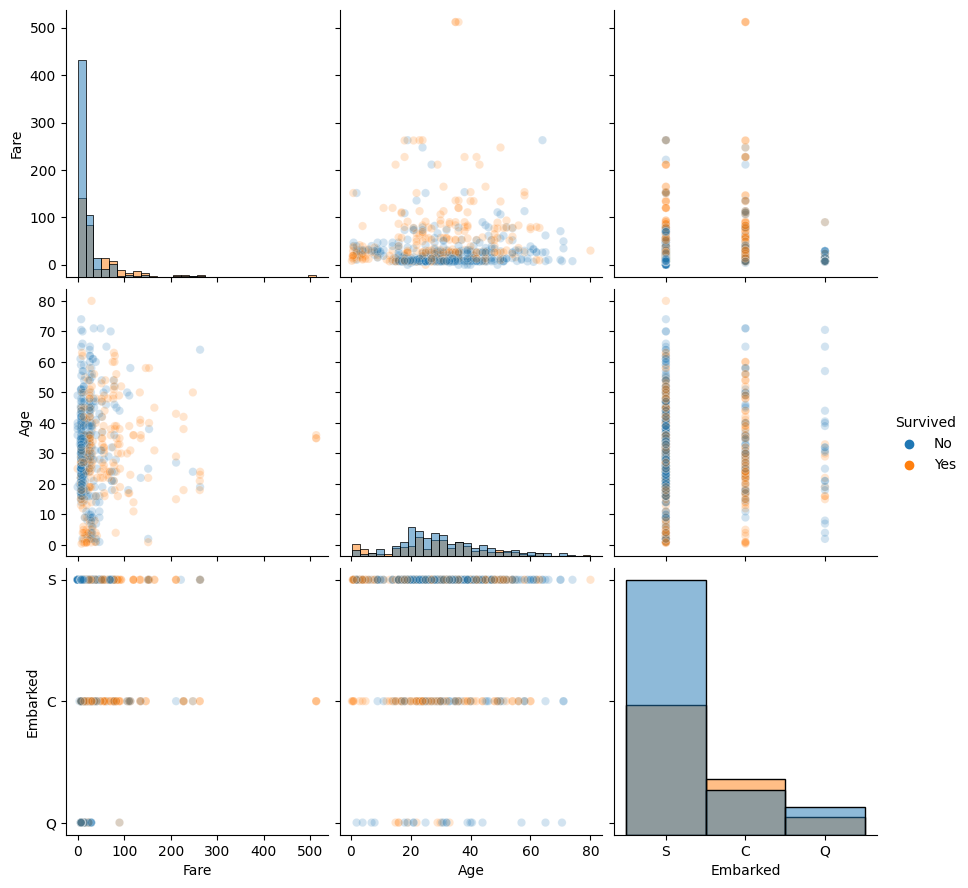

In [ ]:
columns = ["Fare", "Age", "Embarked"]
sns.pairplot(
    data=titanic_data,
    vars=columns,
    hue="Survived",
    plot_kws={"alpha": 0.2},
    height=3,
    diag_kind="hist",
    diag_kws={"bins": 30},
)

In [ ]:
import matplotlib.pyplot as plt

_ = titanic_data[titanic_data["Survived"] == "Yes"]
#plt.hist(_["Age"])

###Dividing data columns by type

In [ ]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,No,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,Yes,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,Yes,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,Yes,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,No,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic_data["Fare"].isna().sum()

0

###Features Selection###

A seguito della data esploration abbiamo concluso che:
*   La feature "Cabin" non va inizialmente considerata perchè contiene troppi NaN -> riduce troppo il dataset. Verrà fatta un'analisi separata includendola, ma raggruppiamo i suoi valori considerando solo le lettere -> la rendiamo categorica.
*  La feature "PassengerId" l'abbiamo esclusa perchè non utile all'analisi.
*  La feature "Name" al momento viene esclusa, perchè non significativa.
*  Una criticità riguarnda i valori mancanti relaivi alla feature "Age": potremmo riuaoverli o sostituirli con la media.
* "Ticket" lo abbiamo tolto perchè preferiamo considerare il costo del biglietto, la "Cabin" e la "Pclass".

In [ ]:
target_column = "Survived"
#numerical_columns = ["Fare", "Age", "SibSp", "Parch"]
numerical_columns = ["Fare", "SibSp", "Parch"]
#categorical_columns = ["Pclass","Sex", "Name", "Ticket", "Embarked", "Cabin"]
categorical_columns = ["Pclass","Sex", "Embarked"]
all_features = numerical_columns + categorical_columns
all = numerical_columns + categorical_columns + [target_column]


titanic_data_ = titanic_data[all]
titanic_data_ = titanic_data_.dropna()
titanic_features = titanic_data_[all_features]
titanic_target = titanic_data_[target_column]

In questo primo approccio abbiamo deciso di eliminare i Nan, senza sostituirli con altri valori.

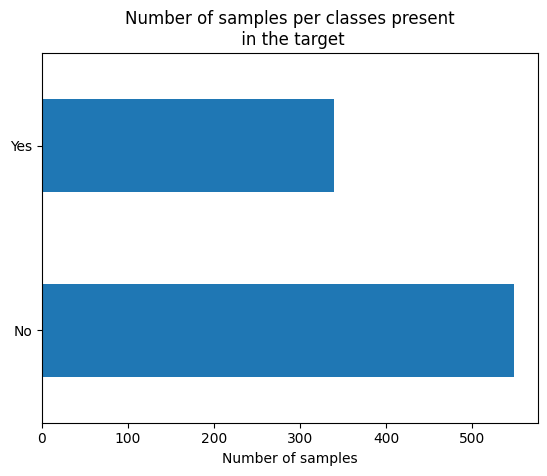

In [175]:
titanic_target.value_counts().plot.barh()
plt.xlabel("Number of samples")
_ = plt.title("Number of samples per classes present\n in the target")

plt.savefig('line_plot.pdf')

In [ ]:
print(f"The dataset contains {titanic_data.shape[0]} samples and {titanic_data.shape[1]} columns")
print(f"The dataset contains {titanic_data.shape[1] - 1} features.")

The dataset contains 891 samples and 12 columns
The dataset contains 11 features.


###Data Preprocessing


*   "one-hot encoding" will be applied to categorical columns. Besides, we use handle_unknown="ignore" to solve the potential issues due to rare categories.

*   "numerical scaling" is applied to numerical features which will be standardized.


In [ ]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler

categorical_preprocessor = OneHotEncoder(handle_unknown="ignore")
numerical_preprocessor = StandardScaler()

In [ ]:
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('one-hot-encoder', categorical_preprocessor, categorical_columns),
    ('standard_scaler', numerical_preprocessor, numerical_columns)])

In [ ]:
from sklearn.model_selection import train_test_split

data_train, data_test, target_train, target_test = train_test_split(
    titanic_features, titanic_target, random_state=1, shuffle=True, test_size=0.2)

TypeError: ignored

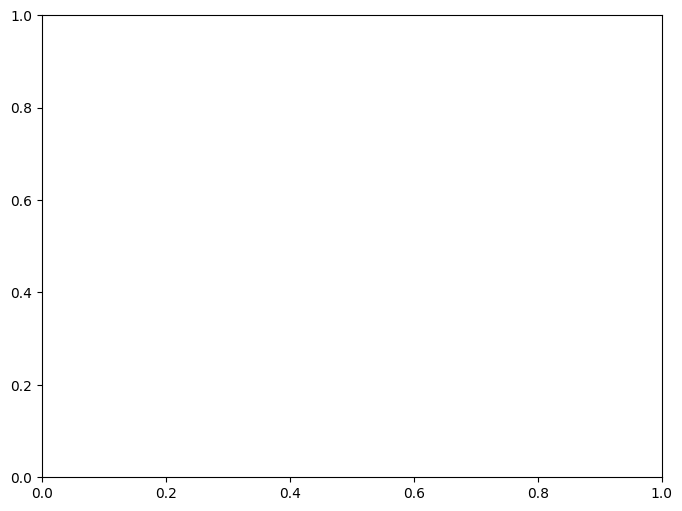

In [187]:
missingdata(data_train)

###Logistic Regression###

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logistic_regressor = Pipeline([("preprovessor", preprocessor), ("classifier",  LogisticRegression())])

#logistic_regressor = make_pipeline(preprocessor, LogisticRegression(max_iter=500))

In [ ]:
from sklearn import set_config
set_config(display='diagram')
logistic_regressor

Pipeline(steps=[('preprovessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier', LogisticRegression())])

In [ ]:
_ = logistic_regressor.fit(data_train, target_train)

###Metriche di Performance###

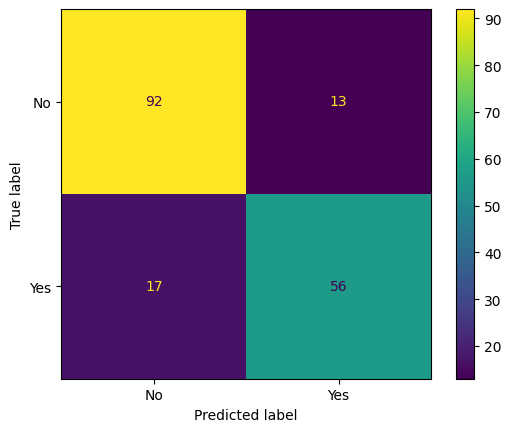

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(logistic_regressor, data_test, target_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score, confusion_matrix

target_predicted = logistic_regressor.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Logistic Regression:")
print("Accuracy: ", accuracy_score(target_test, target_predicted))
print("Balanced accuracy: ", balanced_accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")
print("F1 score: ", 2 * (precision * recall) / (precision + recall))

Metrics for a Logistic Regression:
Accuracy:  0.8314606741573034
Balanced accuracy:  0.8216568819308545
Precision score: 0.812
Recall score: 0.767
F1 score:  0.7887323943661971


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)

target_predicted = dummy_classifier.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Dummy Classifier:")
print("Accuracy:",accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Metrics for a Dummy Classifier:
Accuracy: 0.5898876404494382
Precision score: 0.000
Recall score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


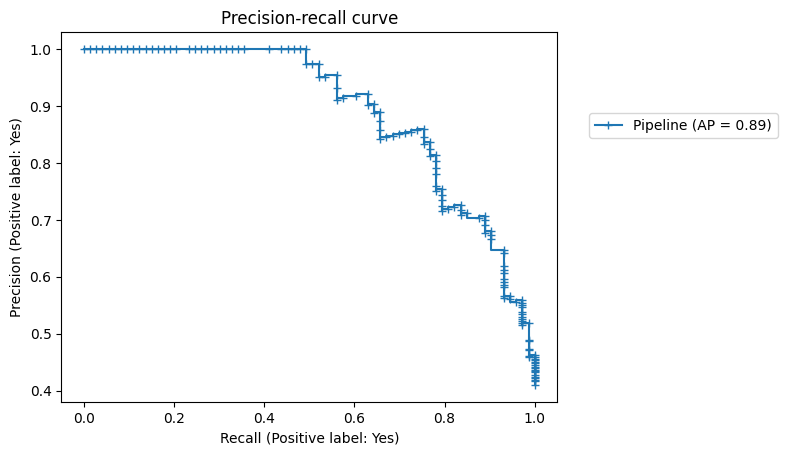

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    logistic_regressor, data_test, target_test, pos_label='Yes',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")



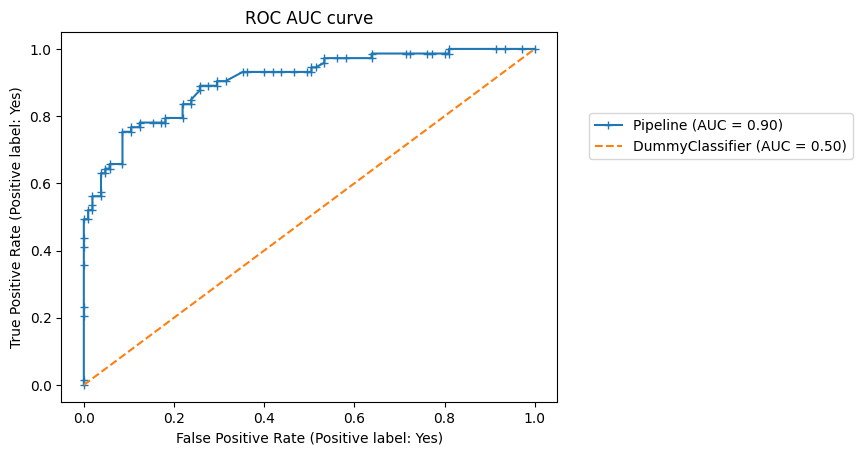

In [ ]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(logistic_regressor, data_test, target_test, pos_label='Yes', marker="+")
disp = RocCurveDisplay.from_estimator(dummy_classifier, data_test, target_test, pos_label='Yes', color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

###Fitting degli iperparametri###

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "classifier__max_iter": (1, 2, 3, 4, 5),
    "classifier__solver": ("lbfgs", "liblinear", "newton-cholesky")
    }
model_grid_search = GridSearchCV(logistic_regressor, param_grid=param_grid, scoring= ("balanced_accuracy"), cv=5, return_train_score=True)

model_grid_search.fit(data_test, target_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprovessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Fare',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('classifier',
                                        LogisticRegression(max_iter=3))]),
             param_grid={'classifier__max_iter': (1, 2, 3, 4, 5),
                         'classifier__solver': ('lbfgs', 'liblinear',
                                                'newton-cholesky')},
             return_train_score=True, scoring='balanced_accuracy')

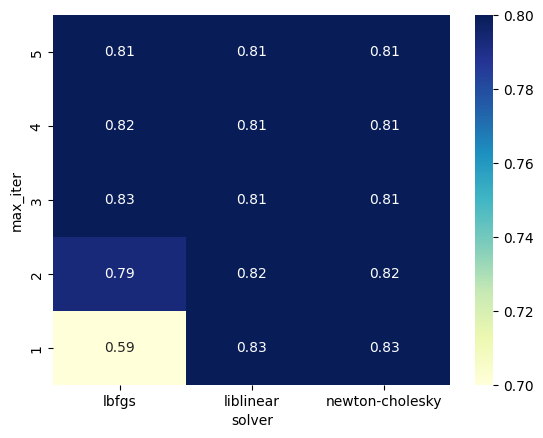

In [ ]:
cv_results = pd.DataFrame(model_grid_search.cv_results_).sort_values(
    "mean_test_score", ascending=False)

#print(cv_results)
# get the parameter names
column_results = [f"param_{name}" for name in param_grid.keys()]
column_results += ["mean_test_score", "std_test_score", "rank_test_score"]
cv_results = cv_results[column_results]


def shorten_param(param_name):
    if "__" in param_name:
        return param_name.rsplit("__", 1)[1]
    return param_name

cv_results = cv_results.rename(shorten_param, axis=1)

pivoted_cv_results = cv_results.pivot_table(
    values="mean_test_score", index=["max_iter"],
    columns=["solver"])

ax = sns.heatmap(pivoted_cv_results, annot=True, cmap="YlGnBu", vmin=0.7, vmax=0.8)
ax.invert_yaxis()

###Overfitting###

In [ ]:
from sklearn.model_selection import validation_curve

max_iter = [1, 2, 3, 4, 5]
train_scores, test_scores = validation_curve(
    logistic_regressor, data_test, target_test, param_name="classifier__max_iter", param_range=max_iter,
    cv=5, scoring="balanced_accuracy", n_jobs=2)
train_errors, test_errors = -train_scores, -test_scores



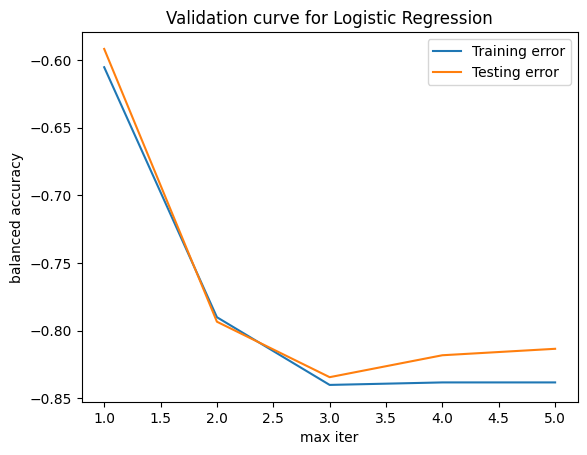

In [ ]:
plt.plot(max_iter, train_errors.mean(axis=1), label="Training error")
plt.plot(max_iter, test_errors.mean(axis=1), label="Testing error")
plt.legend()

plt.xlabel("max iter")
plt.ylabel("balanced accuracy")
_ = plt.title("Validation curve for Logistic Regression")

###Cross Validation per la Logistic Regression###

Siccome il dataset è piccolo utilizziamo una cross validation per mitigarne la varianza.

In [ ]:
"""
from sklearn.model_selection import cross_validate

logistic_regressor = Pipeline([("preprovessor", preprocessor), ("classifier",  LogisticRegression(max_iter=3, solver="liblinear"))])
cv_result = cross_validate(logistic_regressor, titanic_features, titanic_target, cv=5)
#cv_result
scores = cv_result["test_score"]
print(
    "The mean cross-validation accuracy is: "
    f"{scores.mean():.3f} ± {scores.std():.3f}"
)
"""

'\nfrom sklearn.model_selection import cross_validate\n\nlogistic_regressor = Pipeline([("preprovessor", preprocessor), ("classifier",  LogisticRegression(max_iter=3, solver="liblinear"))])\ncv_result = cross_validate(logistic_regressor, titanic_features, titanic_target, cv=5)\n#cv_result\nscores = cv_result["test_score"]\nprint(\n    "The mean cross-validation accuracy is: "\n    f"{scores.mean():.3f} ± {scores.std():.3f}"\n)\n'

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

logistic_regressor = Pipeline([("preprovessor", preprocessor), ("classifier",  LogisticRegression(max_iter=3))])

#logistic_regressor = make_pipeline(preprocessor, LogisticRegression(max_iter=500))
_ = logistic_regressor.fit(data_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


###Metriche di Performance###

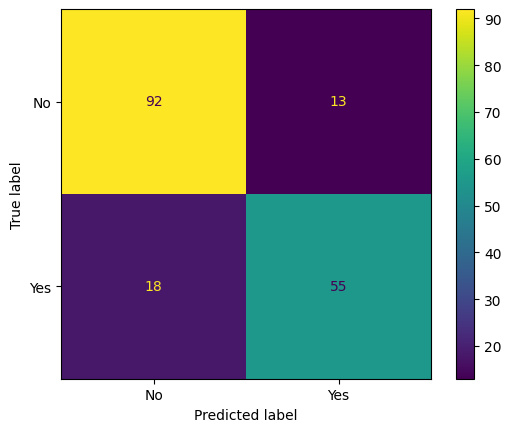

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_ = ConfusionMatrixDisplay.from_estimator(logistic_regressor, data_test, target_test)

In [ ]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, balanced_accuracy_score, confusion_matrix

target_predicted = logistic_regressor.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Logistic Regression:")
print("Accuracy: ", accuracy_score(target_test, target_predicted))
print("Balanced accuracy: ", balanced_accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")
print("F1 score: ", 2 * (precision * recall) / (precision + recall))

Metrics for a Logistic Regression:
Accuracy:  0.8258426966292135
Balanced accuracy:  0.8148075668623613
Precision score: 0.809
Recall score: 0.753
F1 score:  0.7801418439716311


In [ ]:
from sklearn.dummy import DummyClassifier

dummy_classifier = DummyClassifier(strategy="most_frequent")
dummy_classifier.fit(data_train, target_train)

target_predicted = dummy_classifier.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Dummy Classifier:")
print("Accuracy:",accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")

Metrics for a Dummy Classifier:
Accuracy: 0.5898876404494382
Precision score: 0.000
Recall score: 0.000


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


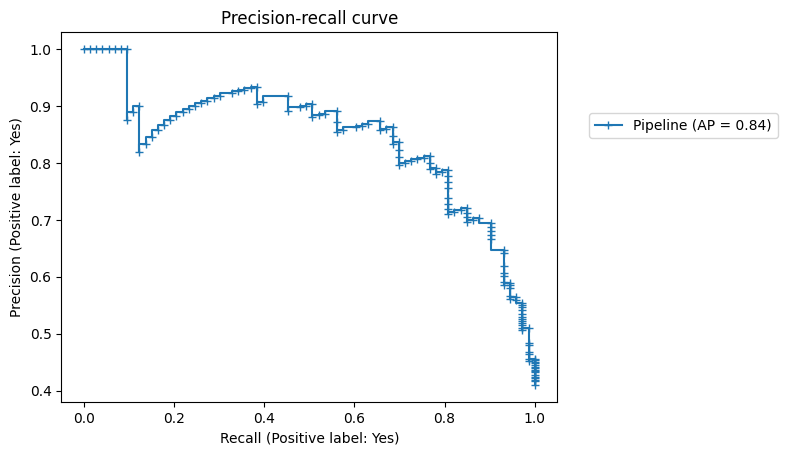

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay

disp = PrecisionRecallDisplay.from_estimator(
    logistic_regressor, data_test, target_test, pos_label='Yes',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")



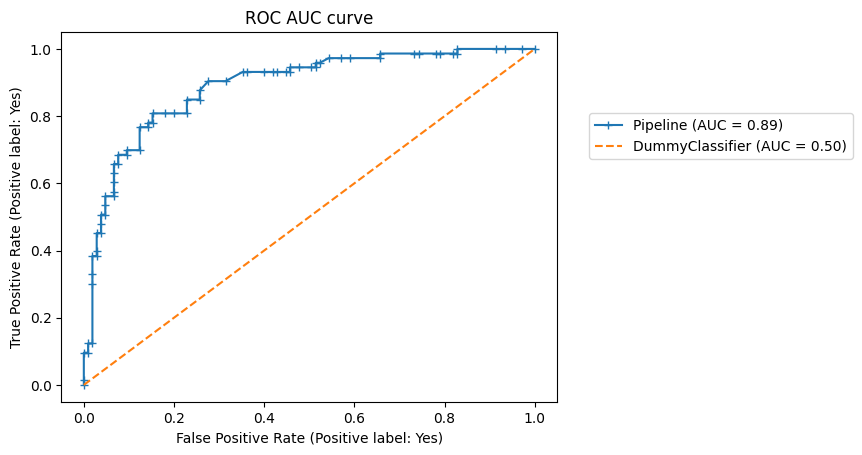

In [ ]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(logistic_regressor, data_test, target_test, pos_label='Yes', marker="+")
disp = RocCurveDisplay.from_estimator(dummy_classifier, data_test, target_test, pos_label='Yes', color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

###Tree Models###

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline([("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier())])

param_grid = {
    "classifier__max_leaf_nodes": [10,15,20,30],
    "classifier__max_depth" : [2,3,4,6,8,10,12]
    }

model_tree_grid_search = GridSearchCV(tree_model,param_grid=param_grid,scoring="balanced_accuracy", cv=5,return_train_score=True)

model_tree_grid_search.fit(data_test, target_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Fare',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('classifier',
                                        DecisionTreeClassifier())]),
             param_grid={'classifier__max_depth': [2, 3, 4, 6, 8, 10, 12],
                         'classifier__max_leaf_nodes': [10, 15, 20, 30]},
             return_train_score=True, scoring='balanced_accuracy')

In [ ]:
print("Best parameter (CV score=%0.3f):" % model_tree_grid_search.best_score_)
print(model_tree_grid_search.best_params_)

Best parameter (CV score=0.828):
{'classifier__max_depth': 2, 'classifier__n_estimators': 15}


In [ ]:
cv_results = pd.DataFrame(model_tree_grid_search.cv_results_).sort_values("mean_test_score", ascending=False)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
columns_results = ["param_classifier__max_leaf_nodes", "param_classifier__max_depth", "mean_test_score", "rank_test_score", "mean_train_score"]
cv_results = cv_results[columns_results]

print(cv_results)

KeyError: ignored

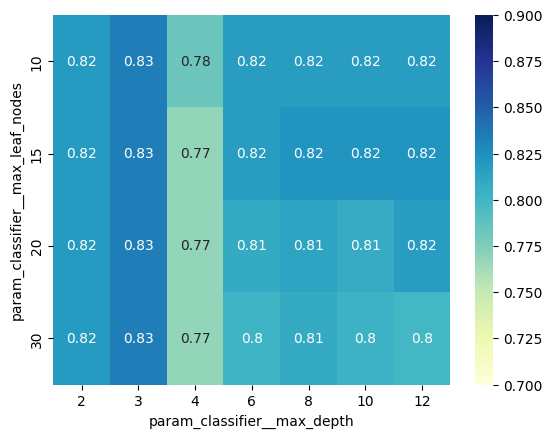

In [ ]:
pivoted_cv_results = cv_results.pivot_table(values="mean_test_score", index=["param_classifier__max_leaf_nodes"],columns=["param_classifier__max_depth"])

ax = sns.heatmap(pivoted_cv_results,annot=True,cmap="YlGnBu", vmin=0.7,vmax=0.9)

In [ ]:
tree_model_best = Pipeline([("preprocessor", preprocessor), ("classifier", DecisionTreeClassifier(max_leaf_nodes=10, max_depth=3, criterion="entropy"))])

tree_model_best.fit(data_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier',
                 DecisionTreeClassifier(criterion='entropy', max_depth=3,
                                        max_leaf_nodes=10))])

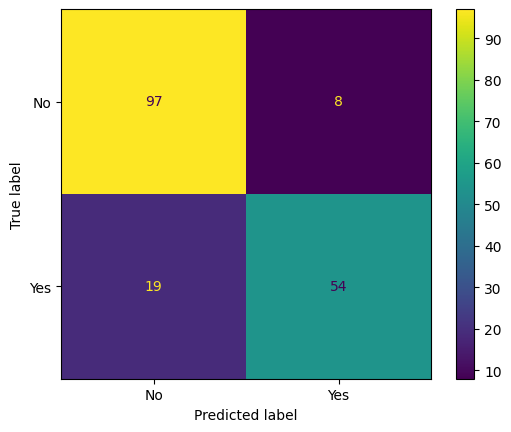

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(tree_model_best, data_test, target_test)

In [ ]:
target_predicted = tree_model_best.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Logistic Regression:")
print("Accuracy: ", accuracy_score(target_test, target_predicted))
print("Balanced accuracy: ", balanced_accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")
print("F1 score: ", 2 * (precision * recall) / (precision + recall))

Metrics for a Logistic Regression:
Accuracy:  0.848314606741573
Balanced accuracy:  0.8317677756033921
Precision score: 0.871
Recall score: 0.740
F1 score:  0.8


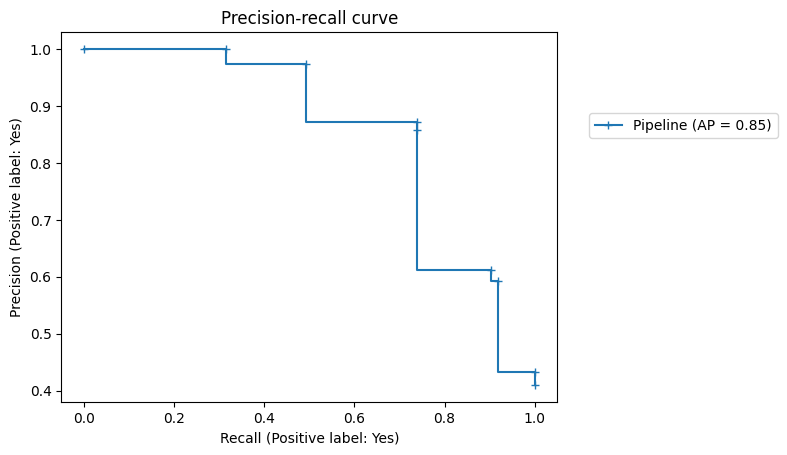

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(
    tree_model_best, data_test, target_test, pos_label='Yes',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

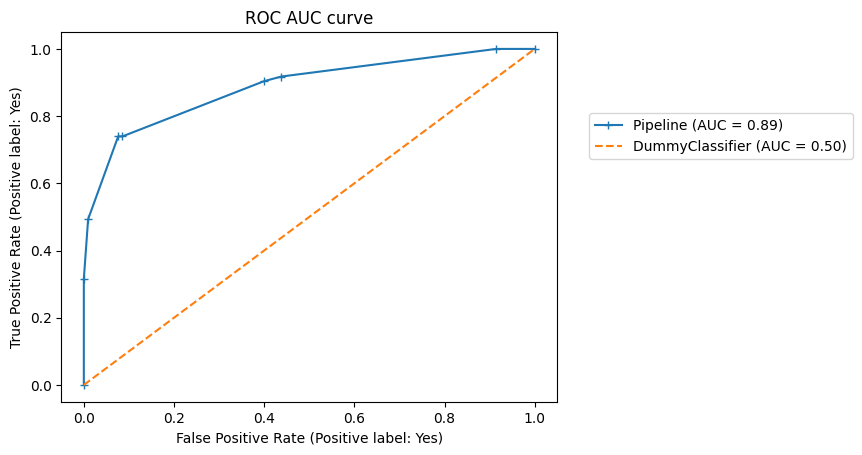

In [ ]:
from sklearn.metrics import RocCurveDisplay

disp = RocCurveDisplay.from_estimator(tree_model_best, data_test, target_test, pos_label='Yes', marker="+")
disp = RocCurveDisplay.from_estimator(dummy_classifier, data_test, target_test, pos_label='Yes', color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

###Random Forest###

**Il problema principale degli alberi decisionali è l'overfitting**

Dato che questi modelli ad albero riescono facilmente a fittare il datasert di training, si caratterizzano dall'avere una **elevata varianza** -> cambiando di poco il training set, la struttura dell'albero può cambiare parecchio, e viceversa, **hanno un bias praticamente nullo** -> **Bagging** -> **Random Forest**.

**Problemi del Random Forest da considerare**


*   Se nel dataset è presente un predittore più forte di altri (con entropia minima) -> avremo bagged trees simili, con quel predittore alla radice.
*   Ho ristretto l'insieme di features tra cui scegliere per fare lo split rispetto agli alberi classici.
*   Quando il numero di features è grande, ma la frazione di attributi rilevanti è piccola performa male (per via del bootstrpping delle features).


In [ ]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier())])

param_grid = {
    "classifier__n_estimators": [25, 50, 75, 100, 150],
    "classifier__max_depth" : [2,3,4,5, 6,8,10,12]
    }

random_forest_grid_search = GridSearchCV(random_forest_model,param_grid=param_grid,scoring="balanced_accuracy", cv=5, return_train_score=True)

random_forest_grid_search.fit(data_test, target_test)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('one-hot-encoder',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['Pclass',
                                                                          'Sex',
                                                                          'Embarked']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['Fare',
                                                                          'SibSp',
                                                                          'Parch'])])),
                                       ('classifier',
                                        RandomForestClassifier())]),
             param_grid={'classifier__max_depth': [2, 3, 4, 5, 6, 8, 10, 12],
                         'classifier__n_estimators': [25, 50, 75, 100, 150]},
             return_train_score=True, scoring='balanced_accuracy')

In [166]:
cv_results = pd.DataFrame(random_forest_grid_search.cv_results_).sort_values("mean_test_score", ascending=False)
cv_results.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_classifier__max_depth', 'param_classifier__n_estimators',
       'params', 'split0_test_score', 'split1_test_score', 'split2_test_score',
       'split3_test_score', 'split4_test_score', 'mean_test_score',
       'std_test_score', 'rank_test_score', 'split0_train_score',
       'split1_train_score', 'split2_train_score', 'split3_train_score',
       'split4_train_score', 'mean_train_score', 'std_train_score'],
      dtype='object')

In [ ]:
columns_results = ["param_classifier__max_depth", "param_classifier__n_estimators", "mean_test_score", "rank_test_score", "mean_train_score"]
cv_results = cv_results[columns_results]

cv_results

,param_classifier__max_depth,param_classifier__n_estimators,mean_test_score,rank_test_score,mean_train_score
7,3,75,0.827619,1,0.842567
9,3,150,0.822857,2,0.840901
8,3,100,0.822857,2,0.840872
14,4,150,0.822857,4,0.859158
12,4,75,0.820476,5,0.857463
1,2,50,0.820000,6,0.824358
0,2,25,0.820000,6,0.824891
2,2,75,0.818095,8,0.830996
6,3,50,0.813333,9,0.841377
4,2,150,0.813333,9,0.827929


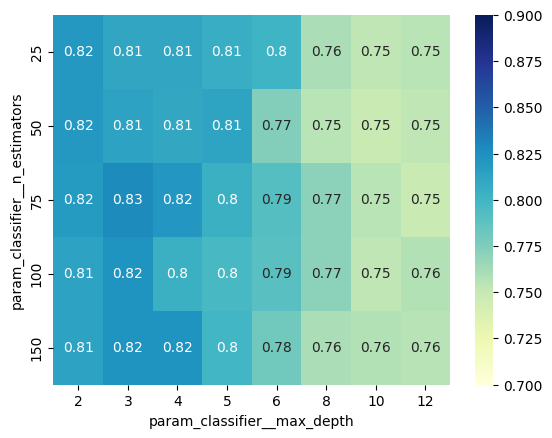

In [167]:
pivoted_cv_results = cv_results.pivot_table(values="mean_test_score", index=["param_classifier__n_estimators"],columns=["param_classifier__max_depth"])

ax = sns.heatmap(pivoted_cv_results,annot=True,cmap="YlGnBu", vmin=0.7,vmax=0.9)

In [ ]:
random_forest_best_model = Pipeline([("preprocessor", preprocessor), ("classifier", RandomForestClassifier(n_estimators=150, max_depth=3))])

In [ ]:
random_forest_best_model.fit(data_train, target_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('one-hot-encoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Pclass', 'Sex',
                                                   'Embarked']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['Fare', 'SibSp',
                                                   'Parch'])])),
                ('classifier',
                 RandomForestClassifier(max_depth=3, n_estimators=150))])

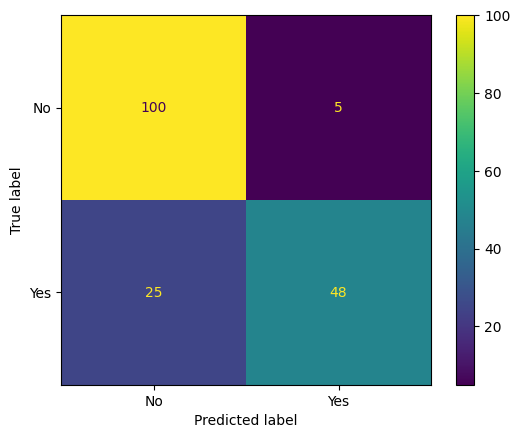

In [ ]:
_ = ConfusionMatrixDisplay.from_estimator(random_forest_best_model, data_test, target_test)

In [ ]:
target_predicted = random_forest_best_model.predict(data_test)

precision = precision_score(target_test, target_predicted, pos_label="Yes")
recall = recall_score(target_test, target_predicted, pos_label="Yes")

print("Metrics for a Logistic Regression:")
print("Accuracy: ", accuracy_score(target_test, target_predicted))
print("Balanced accuracy: ", balanced_accuracy_score(target_test, target_predicted))
print(f"Precision score: {precision:.3f}")
print(f"Recall score: {recall:.3f}")
print("F1 score: ", 2 * (precision * recall) / (precision + recall))

Metrics for a Logistic Regression:
Accuracy:  0.8314606741573034
Balanced accuracy:  0.8049575994781474
Precision score: 0.906
Recall score: 0.658
F1 score:  0.761904761904762


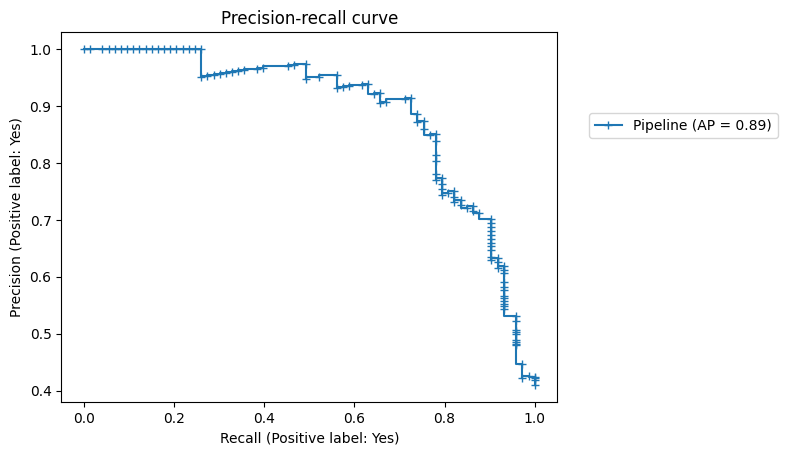

In [ ]:
disp = PrecisionRecallDisplay.from_estimator(
    random_forest_best_model, data_test, target_test, pos_label='Yes',
    marker="+"
)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("Precision-recall curve")

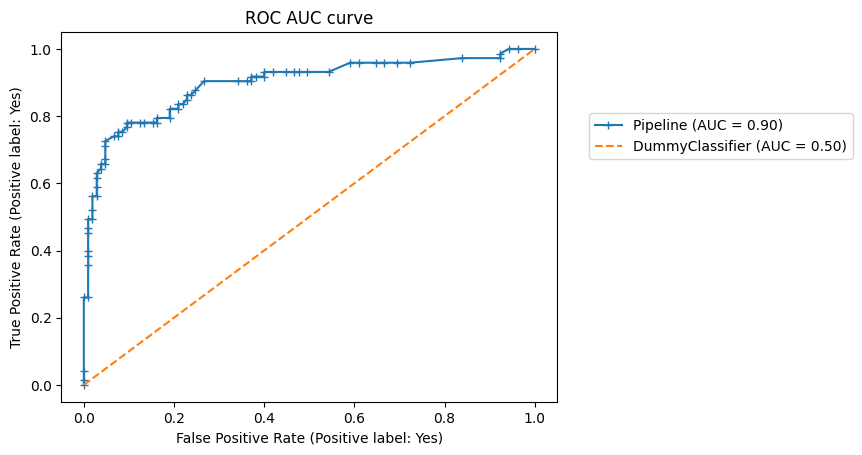

In [ ]:
disp = RocCurveDisplay.from_estimator(random_forest_best_model, data_test, target_test, pos_label='Yes', marker="+")
disp = RocCurveDisplay.from_estimator(dummy_classifier, data_test, target_test, pos_label='Yes', color="tab:orange", linestyle="--", ax=disp.ax_)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = disp.ax_.set_title("ROC AUC curve")

In [ ]:
titanic_data["Cabin"].dropna().transform(lambda x: x[0])

1      C
3      C
6      E
10     G
11     C
      ..
871    D
872    B
879    C
887    B
889    C
Name: Cabin, Length: 204, dtype: object